In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

KeyError: 'variety'

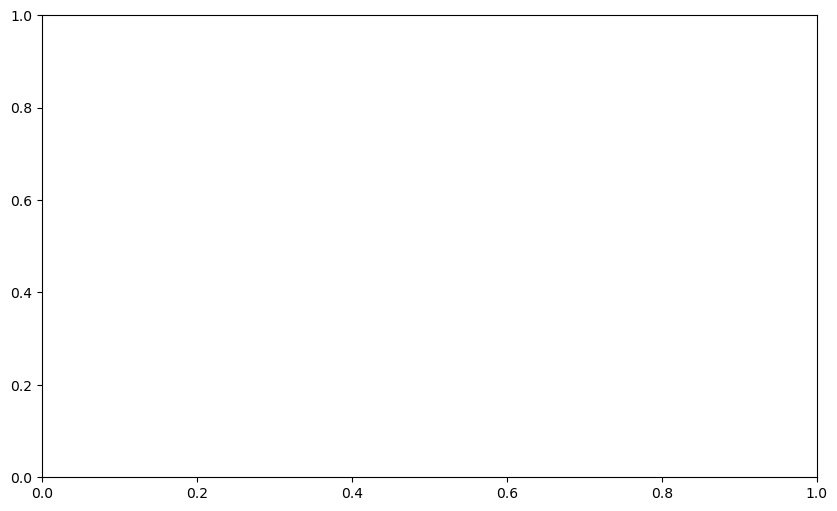

In [2]:
# Load the CSV file
df = pd.read_excel('./Extracted_for Python_3rd_paper.xlsx')

# Extract the categorical columns and the data columns
categories = df.iloc[:, :3]
data = df.iloc[:, 3:]

# Number of variables
num_vars = data.shape[1] // 3

# Define colors for treatments using a seaborn color palette
palette = sns.color_palette("husl", 4)  # Using the 'husl' palette with 4 colors
treatment_colors = {
    'T1': palette[0],
    'T2': palette[1],
    'T3': palette[2],
    'T4': palette[3]
}

# Default color for unspecified treatments
default_color = 'gray'

for i in range(num_vars):
    means = data.iloc[:, i*3]
    errors = data.iloc[:, i*3 + 1]
    letters = data.iloc[:, i*3 + 2]
    
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create a combined category for x-axis
    combined_category = categories['variety'] + '_' + categories['stress']
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'combined_category': combined_category,
        'means': means,
        'errors': errors,
        'letters': letters,
        'treatment': categories['treatment']
    })
    
    # Get unique combined categories and treatments
    unique_categories = plot_data['combined_category'].unique()
    unique_treatments = plot_data['treatment'].unique()
    
    # Set bar width and positions
    bar_width = 0.2
    x = np.arange(len(unique_categories))
    
    # Plot bars with colors based on treatments
    for j, treatment in enumerate(unique_treatments):
        treatment_data = plot_data[plot_data['treatment'] == treatment]
        positions = x + j * bar_width
        ax.bar(positions, treatment_data['means'], yerr=treatment_data['errors'], capsize=5, 
               color=treatment_colors.get(treatment, default_color), width=bar_width, label=treatment)
        for k, (pos, mean, error, letter) in enumerate(zip(positions, treatment_data['means'], 
                                                           treatment_data['errors'], treatment_data['letters'])):
            # Adjust the position of letters based on the mean value
            if mean < 0.01:
                ax.text(pos, mean + error + 0.0001, letter, ha='center')  # Adjusted position for values between 0 and 0.01
            elif mean < 0.05:
                ax.text(pos, mean + error + 0.0001, letter, ha='center')  # Adjusted position for values between 0.01 and 0.05
            elif mean < 0.1:
                ax.text(pos, mean + error + 0.005, letter, ha='center')  # Adjusted position for very small values
            elif mean < 1:
                ax.text(pos, mean + error + 0.01, letter, ha='center')  # Adjusted position for small values
            elif mean < 10:
                ax.text(pos, mean + error + 0.05, letter, ha='center')  # Adjusted position for values between 1 and 10
            elif mean < 50:
                ax.text(pos, mean + error + 0.1, letter, ha='center')  # Adjusted position for values between 10 and 50
            elif mean < 100:
                ax.text(pos, mean + error + 0.2, letter, ha='center')  # Adjusted position for values between 50 and 100
            elif mean < 200:
                ax.text(pos, mean + error + 0.3, letter, ha='center')  # Adjusted position for values between 100 and 200
            else:
                ax.text(pos, mean + error + 0.4, letter, ha='center')  # Adjusted position for values above 200
    
    # Remove the title
    # ax.set_title(f'Variable {i+1}')
    
    ax.set_xlabel('Variety_Stress')
    ax.set_ylabel(data.columns[i*3])  # Set y-axis label as the column name
    
    # Set x-ticks to the middle of the grouped bars
    ax.set_xticks(x + bar_width * (len(unique_treatments) - 1) / 2)
    ax.set_xticklabels(unique_categories, rotation=0)  # Set rotation to 0 for horizontal labels
    
    # Add legend above the plot
    ax.legend(title='Treatment', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(unique_treatments))
    
    # Adjust layout to fit all elements
    plt.subplots_adjust(top=0.85, bottom=0.15)
    
    # Adjust y-axis limits if necessary
    if means.max() < 1:
        ax.set_ylim(0, 1.1 * means.max())
    
    # Save the figure with 300 DPI resolution
    # plt.savefig(f'./{data.columns[i*3]}.png', dpi=300)
    
    plt.show()